<a href="https://colab.research.google.com/github/Alice188912/Alice188912/blob/main/02_dhsi_python_for_text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[link to readings](https://via.hypothes.is/https://dhsi2022.jonreeve.com/static/readings/mikolov.pdf)

[link to lecture video](https://tubedu.org/videos/watch/5746e37d-7581-4386-831b-e406cb6bb946)

[link to spacy](https://spacy.io/)

[link to my binder (something that can embed the runnable codes into the webpage](https://mybinder.org/)

In [46]:
import spacy
import nltk

In [47]:
from nltk.corpus import gutenberg

In [48]:
nltk.download("gutenberg")

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

enter spacy website, choose model, choose language
"web": trained on internet speech (internet writings)

em: too small, not very accurate

so choose "lg": larger, but more accurate

**Now download and load English parser**

In [4]:
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [5]:
nlp = spacy.load("en_core_web_lg")

In [6]:
def spacy_most_similar(word, topn=10):
    ms = nlp.vocab.vectors.most_similar(
        nlp(word).vector.reshape(1,nlp(word).vector.shape[0]), n=topn)
    words = [nlp.vocab.strings[w] for w in ms[0][0]]
    distances = ms[2]
    return words, distances

**all the files in gutenberg**

In [7]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [8]:
emma = gutenberg.raw('austen-emma.txt')

In [9]:
type(emma), len(emma)

(str, 887071)

**get the first 500 words in Emma**

In [10]:
emma [:500]

"[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.\n\nShe was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.  Her mother\nhad died t"

**analyze Emma using spacy parser**

In [11]:
emmaDoc = nlp(emma)

In [ ]:
len(emmaDoc)

In [ ]:
emmaDoc[:30]

In [ ]:
emmaDoc[26]

In [ ]:
comfortable = emmaDoc[26]

use [GloVe](https://nlp.stanford.edu/projects/glove/)

In [ ]:
comfortable.vector.shape

In [ ]:
emmaDoc.vector

In [ ]:
emmaDoc.vector.shape

In [19]:
emmaDoc[17]

handsome

In [20]:
handsome = emmaDoc[17]

In [21]:
clever = emmaDoc[19]

In [22]:
home = emmaDoc[27]

**compare the similarity between two words in a collection of texts**

In [23]:
comfortable.similarity(handsome)

0.35752288

In [24]:
handsome.similarity(clever)

0.47555932

both are adj. used to describe person

In [25]:
clever.similarity(comfortable)

0.3180592

In [26]:
handsome.similarity(home)

0.22793016

In [27]:
comfortable.similarity(clever)

0.3180592

**visualize the distance**

In [28]:
import pandas as pd

pandas is a dataset that keeps data

*code for panda: 

pd.DataFrame([w.vector for w in [**a set of words**]])*

In [29]:
pd.DataFrame([w.vector for w in [handsome, comfortable, home, clever]])


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.48545,-0.311410,-0.29298,-0.187270,-0.066323,0.05497,0.454070,-0.68138,0.023334,1.6600,...,-0.34681,-0.323670,0.039442,-0.048334,0.052368,0.522350,0.740570,0.212870,-0.060673,-0.150150
1,0.78552,0.055299,-0.43261,-0.036727,0.208960,0.11237,0.308550,-0.51400,0.123760,1.9911,...,0.22339,0.363900,-0.059476,-0.333110,0.385020,0.449050,0.072339,0.348980,0.096942,-0.084233
2,0.13523,0.449920,-0.25227,0.048482,0.273690,-0.26302,0.019556,-0.42490,0.595290,2.9473,...,-0.15026,-0.013011,-0.029494,0.509120,0.280090,-0.065423,-0.090613,-0.255070,-0.014630,-0.336080
3,-0.58926,0.147720,-0.19443,-0.588550,-0.760750,0.46817,-0.010063,-0.34770,0.217640,1.4417,...,-0.87678,0.192930,-0.186320,0.473680,0.332330,0.012969,0.563530,-0.003613,-0.051081,0.078023


In [30]:
# label them, because in the pervious code the "handsome" etc. are variables yet here they are strings. 
df = pd.DataFrame([w.vector for w in [handsome, comfortable, home, clever]])
labels = ["handsome", "comfortable", "home", "clever"]
df
# 4 rows: 4 words
# 300 columns: the number of the data shape


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.48545,-0.311410,-0.29298,-0.187270,-0.066323,0.05497,0.454070,-0.68138,0.023334,1.6600,...,-0.34681,-0.323670,0.039442,-0.048334,0.052368,0.522350,0.740570,0.212870,-0.060673,-0.150150
1,0.78552,0.055299,-0.43261,-0.036727,0.208960,0.11237,0.308550,-0.51400,0.123760,1.9911,...,0.22339,0.363900,-0.059476,-0.333110,0.385020,0.449050,0.072339,0.348980,0.096942,-0.084233
2,0.13523,0.449920,-0.25227,0.048482,0.273690,-0.26302,0.019556,-0.42490,0.595290,2.9473,...,-0.15026,-0.013011,-0.029494,0.509120,0.280090,-0.065423,-0.090613,-0.255070,-0.014630,-0.336080
3,-0.58926,0.147720,-0.19443,-0.588550,-0.760750,0.46817,-0.010063,-0.34770,0.217640,1.4417,...,-0.87678,0.192930,-0.186320,0.473680,0.332330,0.012969,0.563530,-0.003613,-0.051081,0.078023


In [31]:
# use pca from tensorflow 
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components = 2)
# we want 2 components


In [33]:
pcaOut = pca.fit_transform(df)
# has four rows, representing four labels
pcaOut

array([[-3.124857  , -0.04651309],
       [ 2.6330526 ,  3.7904885 ],
       [ 3.2613022 , -3.39836   ],
       [-2.7694979 , -0.345614  ]], dtype=float32)

In [34]:
pcaDf = pd.DataFrame(pcaOut)
pcaDf

,0,1
0,-3.124857,-0.046513
1,2.633053,3.790488
2,3.261302,-3.398360
3,-2.769498,-0.345614


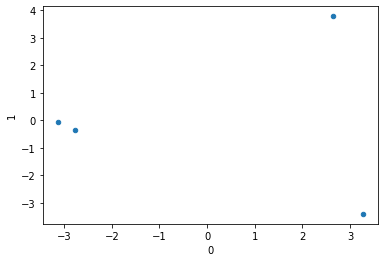

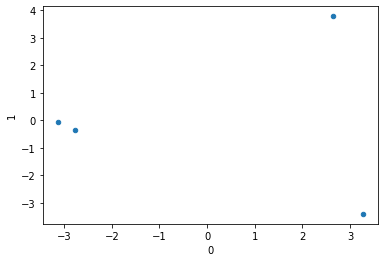

In [35]:
pcaDf.plot (kind = 'scatter', x = 0, y = 1)
ax = pcaDf.plot (kind = "scatter", x = 0, y = 1)

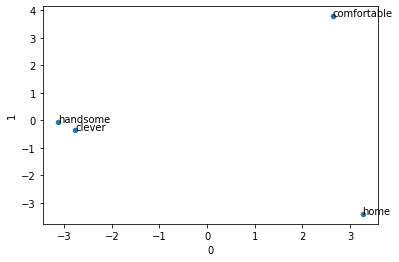

In [36]:
ax = pcaDf.plot (kind = "scatter", x = 0, y = 1)
for i, row in pcaDf.iterrows(): 
  ax.text(x=row[0], y=row[1], s=labels[i])

handsome and clever are both used as people
person semantic field - place semantic field

**code to get one kind of texts**

**[w for w in document if w.pos- == ""]**

In [37]:
# get adj. from Emma
# return the word if it is an adj. in the first 100 words in Emma
# words in "" can also be "ADJ" or "NOUN"
[w for w in emmaDoc [:1000] if w.pos_=="VERB"]

[seemed,
 unite,
 lived,
 distress,
 vex,
 died,
 supplied,
 fallen,
 ceased,
 hold,
 allowed,
 impose,
 passed,
 living,
 attached,
 doing,
 liked,
 esteeming,
 directed,
 having,
 think,
 threatened,
 came,
 married,
 brought,
 sat,
 gone,
 left,
 dine,
 cheer,
 composed,
 sleep,
 sit,
 think,
 lost,
 considering,
 denying,
 wished,
 promoted,
 would,
 felt,
 recalled,
 taught,
 played,
 devoted,
 attach,
 amuse,
 nursed,
 owing,
 followed,
 left,
 informed,
 knowing,
 could,
 speak,
 arose,
 could,
 find,
 bear,
 going,
 suffering,
 loved,
 could,
 meet,
 married,
 increased,
 having,
 could,
 recommended,
 removed,
 settled]

In [38]:
emmaAdjs100 = [w for w in emmaDoc if w.pos_ == "VERB"][:100]
# first 100 adj. in Emma

In [39]:
emmaAdjs100

[seemed,
 unite,
 lived,
 distress,
 vex,
 died,
 supplied,
 fallen,
 ceased,
 hold,
 allowed,
 impose,
 passed,
 living,
 attached,
 doing,
 liked,
 esteeming,
 directed,
 having,
 think,
 threatened,
 came,
 married,
 brought,
 sat,
 gone,
 left,
 dine,
 cheer,
 composed,
 sleep,
 sit,
 think,
 lost,
 considering,
 denying,
 wished,
 promoted,
 would,
 felt,
 recalled,
 taught,
 played,
 devoted,
 attach,
 amuse,
 nursed,
 owing,
 followed,
 left,
 informed,
 knowing,
 could,
 speak,
 arose,
 could,
 find,
 bear,
 going,
 suffering,
 loved,
 could,
 meet,
 married,
 increased,
 having,
 could,
 recommended,
 removed,
 settled,
 must,
 struggled,
 brought,
 fill,
 give,
 amounting,
 belong,
 afforded,
 looked,
 could,
 accepted,
 could,
 sigh,
 wish,
 awoke,
 made,
 required,
 used,
 hating,
 hating,
 reconciled,
 could,
 speak,
 obliged,
 part,
 suppose,
 could,
 feel,
 disposed]

In [40]:
df2 = pd.DataFrame([w.vector for w in emmaAdjs100])
df2

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.118560,0.059397,-0.040724,0.115800,-0.010206,0.130220,0.025382,0.068701,-0.166050,3.25540,...,-0.156580,0.240010,0.327300,0.340490,0.300290,0.481810,0.146850,-0.035301,0.167830,-0.137390
1,-0.141140,-0.299660,0.273670,-0.040477,0.011438,-0.768550,-0.294610,0.735990,-0.151860,1.84820,...,-0.325290,0.130320,-0.055372,-0.399830,-0.666190,-0.124610,0.513670,-0.293630,-0.302520,0.194330
2,0.489290,0.185420,0.035343,-0.291660,0.260920,0.324240,0.035707,0.006536,0.242270,3.56360,...,-0.209110,0.086586,-0.343590,0.653290,0.222870,0.105510,-0.231340,0.278190,0.000008,-0.617440
3,-0.826590,0.545060,-0.515190,0.142330,-0.603970,-0.928010,0.107500,0.044845,-0.236490,1.82370,...,-0.444860,0.209330,0.125230,0.032595,0.289980,0.191920,0.064248,0.073600,-0.207680,0.030308
4,-0.134810,-0.542600,0.195970,-0.569390,-0.093650,-0.001632,0.176690,0.123120,-0.413380,-0.32636,...,-0.503320,-0.914460,-0.054383,0.085445,0.159030,-0.142530,-0.314770,-0.125370,-0.411090,-0.488890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.017526,0.017963,0.070976,0.247970,0.069849,-0.024703,-0.089529,0.212050,-0.066737,2.24770,...,-0.274430,-0.023149,-0.112640,-0.258210,-0.099369,0.080873,-0.155610,0.073454,-0.315570,0.116690
96,-0.140280,-0.019835,-0.399620,-0.349740,-0.248410,0.232130,0.050406,-0.175800,0.140190,2.16610,...,-0.094409,-0.118370,-0.458080,-0.013415,0.278720,0.125830,-0.284930,-0.202360,0.127840,0.000976
97,-0.103760,0.206520,-0.193710,0.080069,-0.140730,-0.084578,-0.202190,-0.109440,-0.218480,3.06170,...,-0.347040,0.276880,0.190000,0.059757,0.218450,0.015737,-0.235340,-0.240720,0.308560,0.179220
98,0.126660,0.609630,-0.337180,0.045865,0.071621,0.116640,0.301630,-0.240020,-0.212050,2.57970,...,-0.003889,0.129150,-0.047795,-0.191600,0.228050,0.247890,-0.468200,0.068683,0.283640,0.340470


In [41]:
# set the labels
adjLabels = [w.lemma_ for w in emmaAdjs100]
adjLabels

['seem',
 'unite',
 'live',
 'distress',
 'vex',
 'die',
 'supply',
 'fall',
 'cease',
 'hold',
 'allow',
 'impose',
 'pass',
 'live',
 'attach',
 'do',
 'like',
 'esteem',
 'direct',
 'have',
 'think',
 'threaten',
 'come',
 'marry',
 'bring',
 'sit',
 'go',
 'leave',
 'dine',
 'cheer',
 'compose',
 'sleep',
 'sit',
 'think',
 'lose',
 'consider',
 'deny',
 'wish',
 'promote',
 'would',
 'feel',
 'recall',
 'teach',
 'play',
 'devote',
 'attach',
 'amuse',
 'nurse',
 'owe',
 'follow',
 'leave',
 'inform',
 'know',
 'could',
 'speak',
 'arise',
 'could',
 'find',
 'bear',
 'go',
 'suffer',
 'love',
 'could',
 'meet',
 'marry',
 'increase',
 'have',
 'could',
 'recommend',
 'remove',
 'settle',
 'must',
 'struggle',
 'bring',
 'fill',
 'give',
 'amount',
 'belong',
 'afford',
 'look',
 'could',
 'accept',
 'could',
 'sigh',
 'wish',
 'awake',
 'make',
 'require',
 'use',
 'hate',
 'hate',
 'reconcile',
 'could',
 'speak',
 'oblige',
 'part',
 'suppose',
 'could',
 'feel',
 'dispose']

In [42]:
pcaOut = pca.fit_transform(df2)
pcaOut

array([[-1.3187754e+00, -1.2664853e-01],
       [ 1.4741724e+00,  6.1714852e-01],
       [-1.8063184e+00,  2.4129272e+00],
       [ 1.5713248e+00,  9.7295427e-01],
       [ 2.2806857e+00,  1.9597441e+00],
       [-1.9622180e+00,  3.0053456e+00],
       [ 2.5511966e+00, -1.6747097e+00],
       [ 3.6602009e-02,  1.1162269e+00],
       [ 1.6824423e+00,  1.4303901e+00],
       [ 3.7246367e-01, -1.4627452e+00],
       [ 7.2381842e-01, -1.2511785e+00],
       [ 2.7677665e+00, -9.6504921e-01],
       [-4.7716253e-02,  3.8528877e-01],
       [-8.6559016e-01,  8.6252725e-01],
       [ 1.7130355e+00, -1.7968847e+00],
       [-1.3935570e+00, -7.6035589e-01],
       [-2.0136671e+00,  3.2184297e-01],
       [ 3.5523407e+00,  3.6240458e+00],
       [ 1.5879849e+00, -4.6499485e-01],
       [-3.1802544e-01, -5.7060200e-01],
       [-2.0805871e+00, -1.0345647e+00],
       [ 8.3163601e-01,  5.7329643e-01],
       [-1.5272077e+00,  3.8424593e-01],
       [-2.1480598e+00,  2.7700129e+00],
       [-1.93910

In [43]:
pd.DataFrame(pcaOut)

,0,1
0,-1.318775,-0.126649
1,1.474172,0.617149
2,-1.806318,2.412927
3,1.571325,0.972954
4,2.280686,1.959744
...,...,...
95,0.294526,-0.994839
96,-0.702119,-0.328062
97,-1.107477,-1.854616
98,-1.660887,-0.857129


In [44]:
emmaAdjPca = pd.DataFrame(pcaOut)

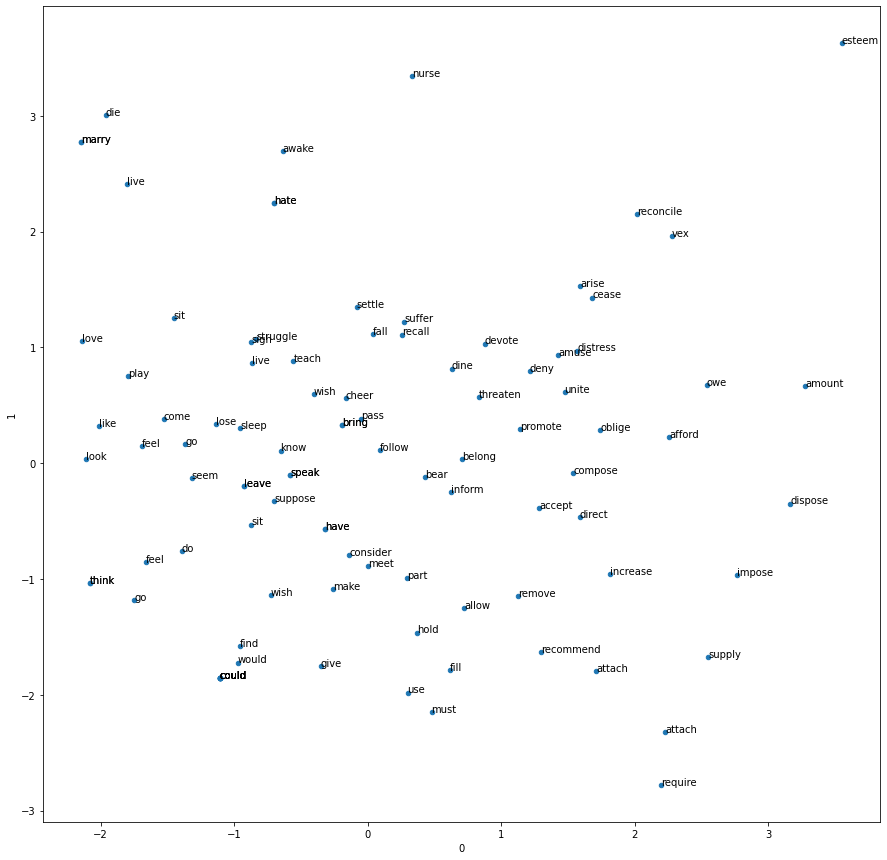

In [45]:
ax = emmaAdjPca.plot(kind = 'scatter', x = 0, y = 1, figsize = (15, 15))
for i, row in emmaAdjPca.iterrows():
  ax.text(x=row[0], y=row[1],s=adjLabels[i])

positive words, negative words, semantic fields

document vectors

In [50]:
rawText = [gutenberg.raw(fid) for fid in gutenberg.fileids()]
# get the fid (file id)

In [53]:
labels = [fid [: -4] for fid in gutenberg.fileids()]
# the last three file ids

In [54]:
labels

['austen-emma',
 'austen-persuasion',
 'austen-sense',
 'bible-kjv',
 'blake-poems',
 'bryant-stories',
 'burgess-busterbrown',
 'carroll-alice',
 'chesterton-ball',
 'chesterton-brown',
 'chesterton-thursday',
 'edgeworth-parents',
 'melville-moby_dick',
 'milton-paradise',
 'shakespeare-caesar',
 'shakespeare-hamlet',
 'shakespeare-macbeth',
 'whitman-leaves']

In [56]:
docs = [nlp (text [:10000]) for text in rawText]
#look at the first 100000 characters

In [ ]:
docs[0]

In [ ]:
vecs = [doc.vector for doc in docs]
vecs

In [59]:
df3 = pd.DataFrame(vecs)

In [62]:
df3
# 18 rows because there are 18 files in labels

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.016244,0.187494,-0.151331,-0.063859,0.077160,0.006681,0.029320,-0.125978,-0.066799,2.099266,...,-0.143843,0.041233,-0.007079,-0.029134,0.053672,0.005752,-0.007443,-0.036844,0.002190,0.024258
1,-0.006876,0.173534,-0.131557,-0.068678,0.061081,0.002351,0.019629,-0.112031,-0.065314,2.149723,...,-0.163044,0.037227,-0.001317,-0.018368,0.018878,0.017455,-0.005986,-0.037985,-0.005545,0.018123
2,-0.000993,0.170193,-0.133286,-0.056598,0.069807,-0.002466,0.016886,-0.109226,-0.067872,2.134543,...,-0.155412,0.031415,0.001914,-0.016935,0.023320,0.011519,-0.004599,-0.024963,-0.004927,0.017459
3,0.012871,0.101830,-0.076114,-0.140074,0.061971,-0.059283,0.046277,-0.073400,-0.101678,1.978868,...,-0.178044,-0.007431,-0.036304,-0.020010,-0.081766,0.019870,0.046971,0.061262,-0.036101,-0.008123
4,0.006234,0.136865,-0.109430,-0.075929,0.086357,-0.029823,0.027223,-0.038375,-0.083382,1.833877,...,-0.174802,0.006932,0.004553,-0.043459,-0.048804,0.049106,0.038717,0.025313,-0.025537,0.021950
5,-0.001997,0.165431,-0.145104,-0.068064,0.102213,0.003728,-0.013521,-0.102367,-0.066217,2.079596,...,-0.174051,0.023064,0.038248,-0.044629,0.000026,0.002429,0.017089,0.016816,0.002304,0.031345
6,-0.031983,0.165656,-0.154858,-0.091357,0.094554,0.033653,-0.016142,-0.115313,-0.060703,2.137341,...,-0.161525,0.027858,0.003337,-0.044719,0.023765,0.018002,0.000443,0.000668,0.027335,0.040381
7,-0.010769,0.194250,-0.142248,-0.073109,0.101338,0.013490,0.019809,-0.116202,-0.073920,2.063831,...,-0.139226,0.025069,0.024075,-0.043752,0.021898,-0.013333,-0.055604,-0.001776,0.029383,0.053390
8,-0.001470,0.142658,-0.123610,-0.073058,0.098306,-0.006898,0.001041,-0.054625,-0.066499,2.014155,...,-0.161893,0.018360,0.018113,-0.045321,-0.014973,0.027501,-0.011893,0.015862,-0.002559,0.034034
9,0.001632,0.147017,-0.133571,-0.067541,0.108846,-0.002777,-0.000279,-0.078887,-0.067898,1.992629,...,-0.153690,0.016961,0.024189,-0.046311,-0.007396,0.035919,0.007636,0.012410,0.002081,0.032322


In [63]:
pcaOut = pca.fit_transform (df3)

In [64]:
pcaOut

array([[-0.2200914 , -0.07282436],
       [-0.1840826 ,  0.05866268],
       [-0.16486529,  0.08537062],
       [ 0.29558134,  0.47917494],
       [ 0.18826762,  0.12499789],
       [-0.32113004, -0.01032246],
       [-0.41104454, -0.09360008],
       [-0.3357101 , -0.16905428],
       [-0.13987142, -0.0017568 ],
       [-0.15635045, -0.01736281],
       [-0.19965504,  0.00056451],
       [-0.26623884, -0.00390995],
       [-0.01943197, -0.0096524 ],
       [ 0.31428748,  0.23207791],
       [ 0.5276307 , -0.2563228 ],
       [ 0.46282512, -0.20156385],
       [ 0.5326143 , -0.20511067],
       [ 0.09726412,  0.06063271]], dtype=float32)

In [72]:
def plotPCA (ef, labels):
  ax = df3.plot(kind = 'scatter', x = 0, y = 1, figsize = (12, 12))
  for i, row in df3.iterrows():
    ax.text(x=row[0], y=row[1],s=labels[i])

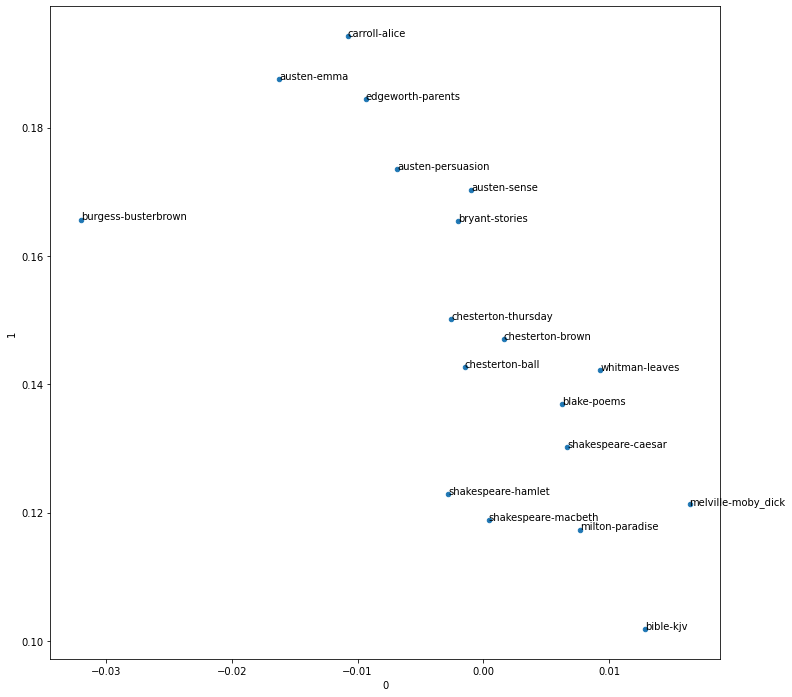

In [73]:
plotPCA(df, labels)

In [76]:
# try other corpus
from nltk.corpus import inaugural
nltk.download('inaugural')

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.


True

In [77]:
rawText = [inaugural.raw(fid) for fid in inaugural.fileids()]

In [78]:
labels = [fid [:-4] for fid in inaugural.fileids()]

In [ ]:
labels

In [ ]:
[text[:-4] for text in rawText]

In [82]:
docs = [nlp(text) for text in rawText]

In [84]:
vecs = [doc.vector for doc in docs]

In [ ]:
df4 = pd.DataFrame(vecs)
df4

In [ ]:
pcaOut = pd.DataFrame(pca.fit_transform(df4))
pcaOut

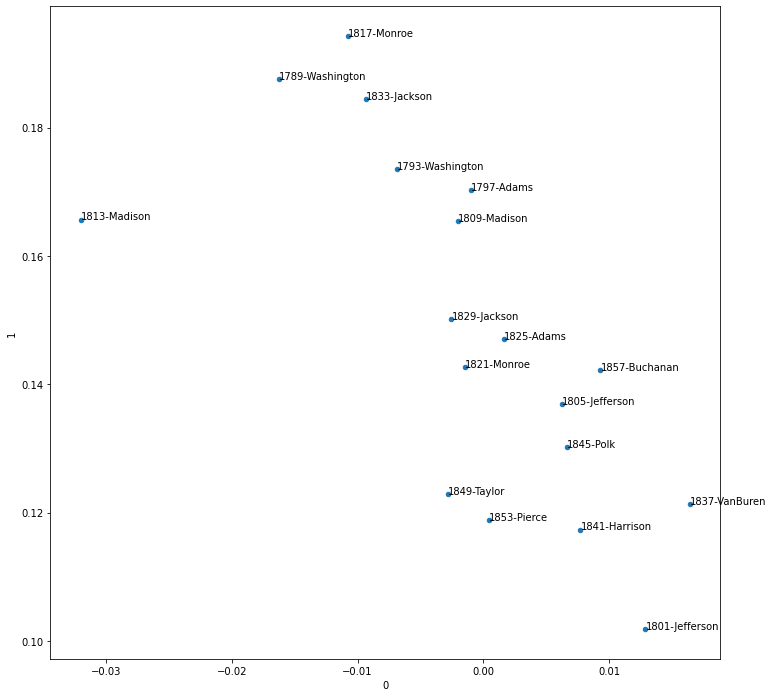

In [89]:
plotPCA (pcaOut, labels)